<a href="https://colab.research.google.com/github/munawarali93/NASA-Near-Earth-Objects/blob/main/XGBoost_LogisticRegressionNASA_ERDOS_NEOs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Mentor:
Kashif bari

##Team members:
1. Munawar Ali
2. Cagatay Ayhan
3. Ece KARACAM
4. Mostofa Hisham
5. Waleed Ahmed

Near-Earth Objects (NEOs) are comets and asteroids that have been nudged by the gravitational attraction of nearby planets into orbits that allow them to enter the Earth’s neighborhood. As they orbit the Sun, Near-Earth Objects occasionally approach close to Earth. We plan to develop several models for detecting whether or not a NEO is hazardous. We will likely use the data provided here: https://www.kaggle.com/datasets/sameepvani nasa-nearest-earth-objects/data
Sources: https://api.nasa.gov
https://cneos.jpl.nasa.gov/ca/

##Basic Modules

In [ ]:
!git clone https://github.com/munawarali93/NASA-Near-Earth-Objects

Cloning into 'NASA-Near-Earth-Objects'...
remote: Enumerating objects: 35, done.
remote: Counting objects: 100% (35/35), done.
remote: Compressing objects: 100% (32/32), done.
remote: Total 35 (delta 10), reused 7 (delta 2), pack-reused 0
Receiving objects: 100% (35/35), 6.61 MiB | 8.77 MiB/s, done.
Resolving deltas: 100% (10/10), done.


In [ ]:
! ls -l

total 8
drwxr-xr-x 3 root root 4096 Nov 30 06:57 NASA-Near-Earth-Objects
drwxr-xr-x 1 root root 4096 Nov 28 14:27 sample_data


In [ ]:
path = r'/content/drive/MyDrive/NASA_near_earth_objects'

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##Data

In [ ]:
nasa = pd.read_csv("/content/drive/MyDrive/NASA_near_earth_objects/neo.csv.zip")
print(nasa.shape)
nasa['average_diameter'] = (nasa['est_diameter_max'] + nasa['est_diameter_min'])/2

(90836, 10)


In [ ]:
nasa = nasa.drop(columns = ['orbiting_body','sentry_object', 'id', 'name']).copy()

In [ ]:
nasa['hazardous'] = nasa['hazardous'].replace({True: 1, False: 0})
nasa.head()

,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude,hazardous,average_diameter
0,1.198271,2.679415,13569.249224,5.483974e+07,16.73,0,1.938843
1,0.265800,0.594347,73588.726663,6.143813e+07,20.00,1,0.430073
2,0.722030,1.614507,114258.692129,4.979872e+07,17.83,0,1.168268
3,0.096506,0.215794,24764.303138,2.543497e+07,22.20,0,0.156150
4,0.255009,0.570217,42737.733765,4.627557e+07,20.09,1,0.412613


In [ ]:
nasa.isnull().values.any()

False

In [ ]:
y = nasa['hazardous'].copy()
X = nasa.drop('hazardous', axis=1).copy()
y.shape

(90836,)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=123)

In [ ]:
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(scaler.fit_transform(X_test), columns=X_test.columns)
X_test.head()

,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude,average_diameter
0,-0.241763,-0.241763,1.839959,1.626412,0.200282,-0.241763
1,-0.327296,-0.327296,-0.485456,-1.635437,1.309361,-0.327296
2,-0.294486,-0.294486,-0.044115,-0.213024,0.685504,-0.294486
3,-0.074019,-0.074019,2.115757,1.533433,-0.492893,-0.074019
4,0.033767,0.033767,0.703381,1.528975,-0.738970,0.033767


##Preprocessing
Correlation Heatmap

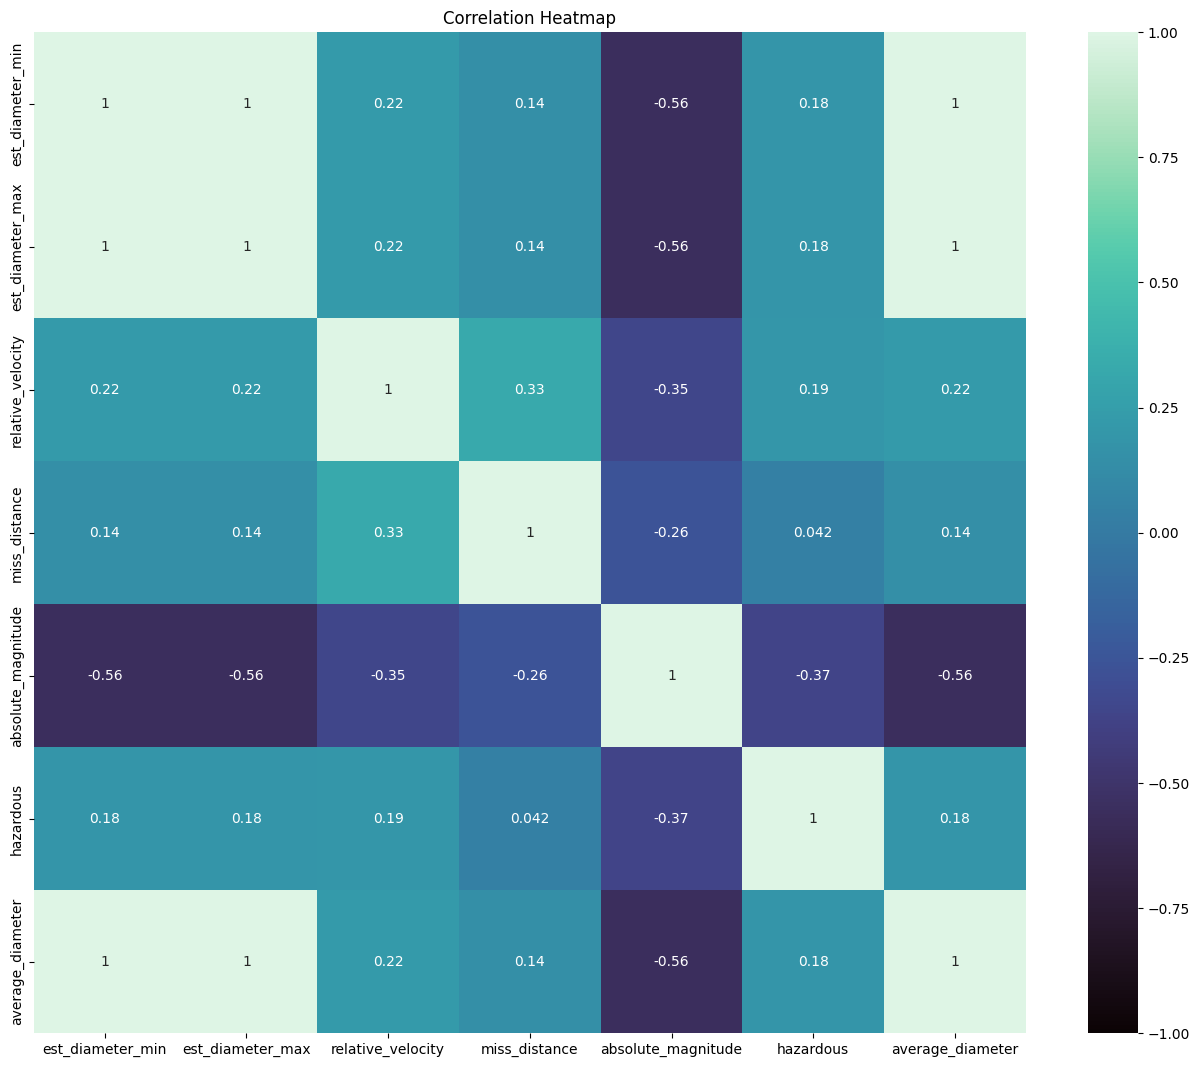

In [ ]:
corr = nasa.corr()
plt.figure(figsize=(16, 13))
sns.heatmap(corr, annot=True, vmin=-1.0, cmap='mako')
plt.title("Correlation Heatmap")
plt.show()

Histograms

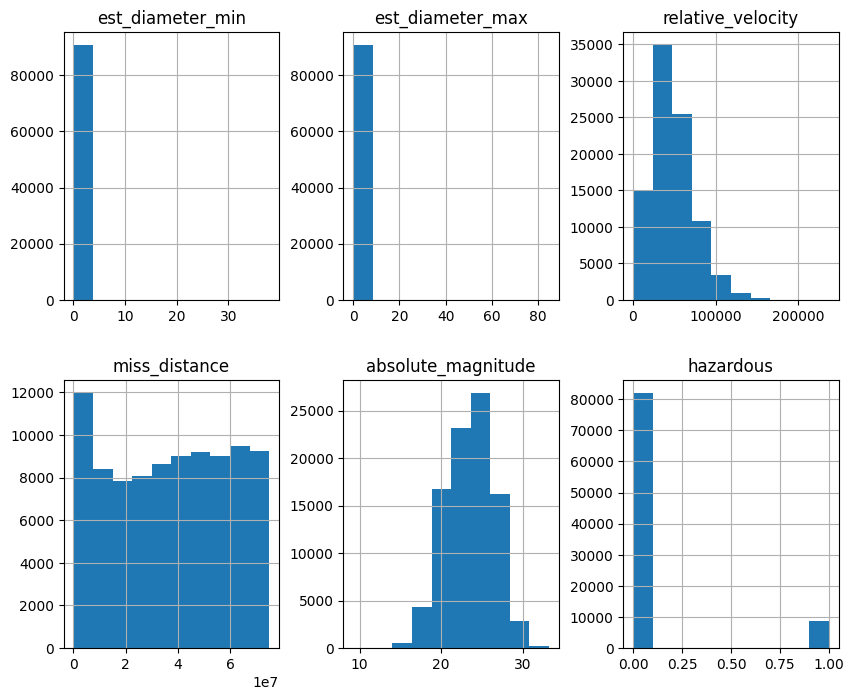

In [ ]:
from itertools import combinations
fig, axes = plt.subplots(len(nasa.columns)//3, 3, figsize=(10, 8))
i = 0
for triaxis in axes:
    for axis in triaxis:
        nasa.hist(column = nasa.columns[i], bins = 10, ax=axis)
        i = i+1

Label Distribution

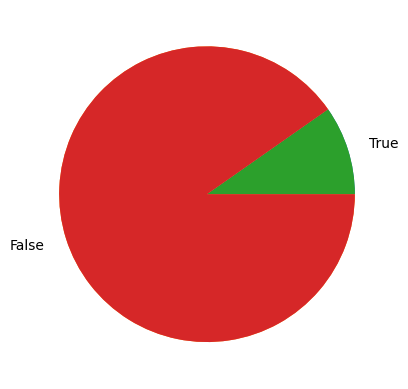

True Percentage: 9.7318 %
False Percentage: 90.2682 %


In [ ]:
names='True', 'False',
t = y.sum()
f = len(y) - t
values=[t,f]
plt.pie(values)
plt.pie(values, labels=names, labeldistance=1.15);
plt.show()
print("True Percentage:", round(t/len(y)*100, 4), "%")
print("False Percentage:", round(f/len(y)*100, 4), "%")

Correlation via seaborn

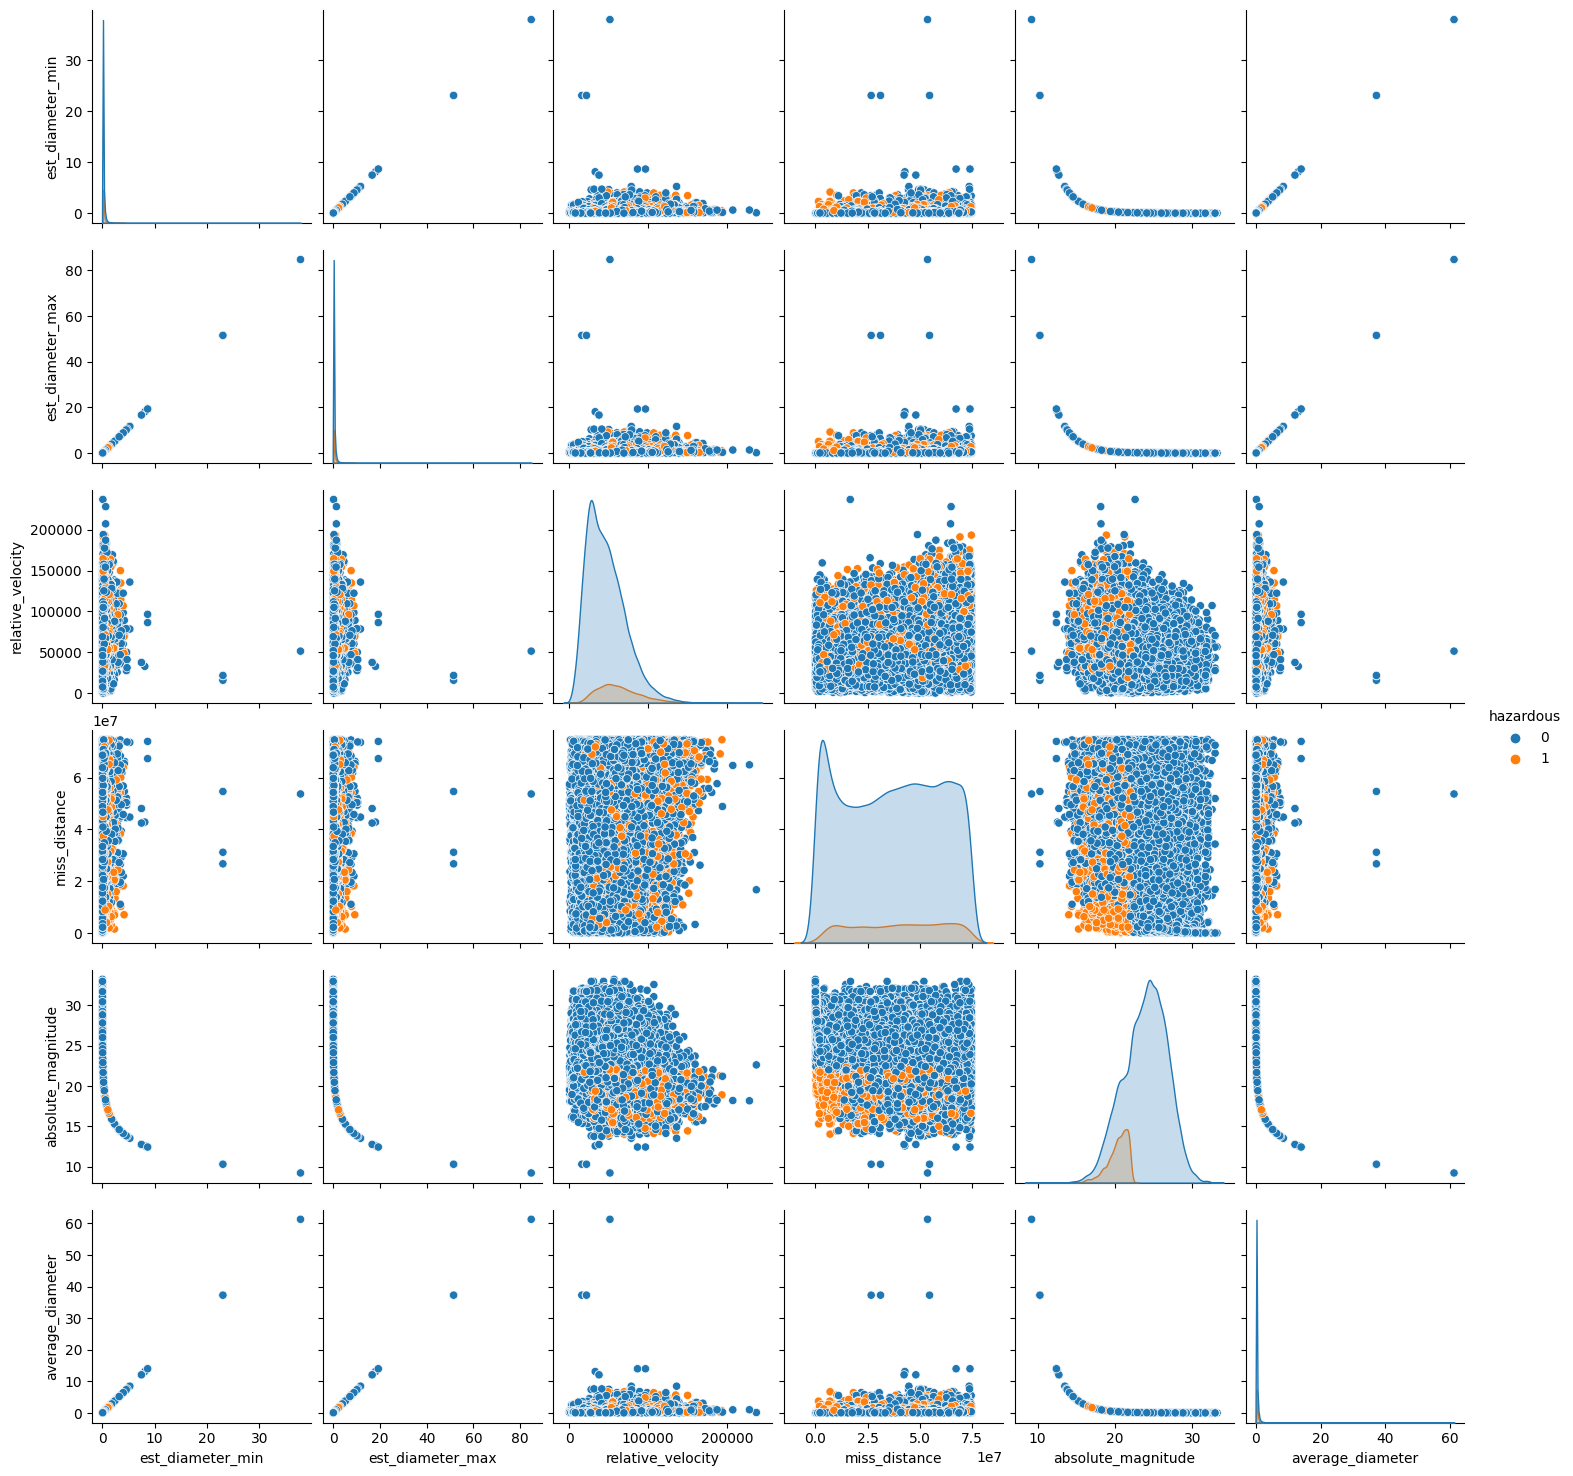

In [ ]:
import seaborn as sns
sns.pairplot(nasa, hue = 'hazardous')
plt.show()

<ipython-input-17-1c7f4d39977c>:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


<Figure size 640x480 with 0 Axes>

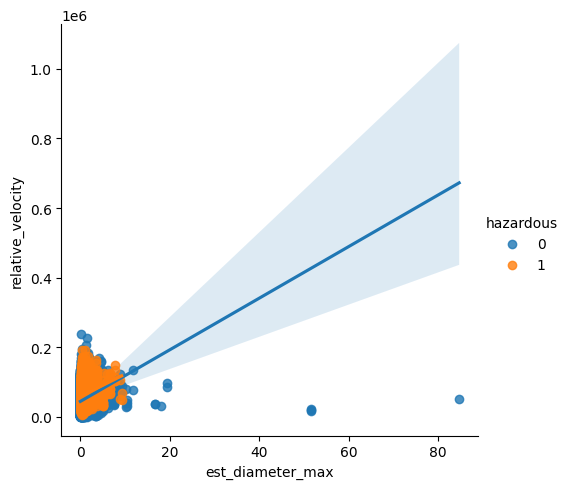

<Figure size 640x480 with 0 Axes>

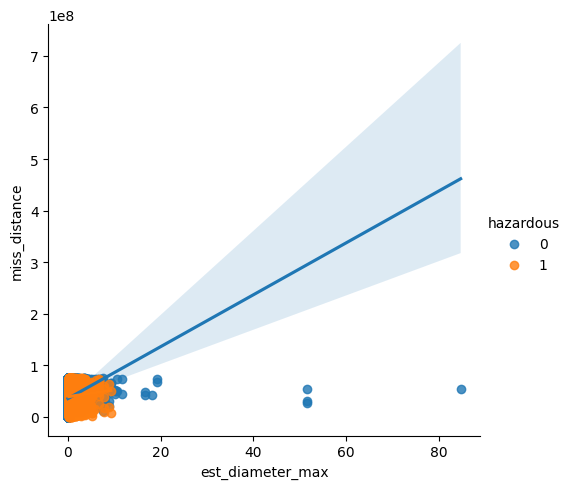

<Figure size 640x480 with 0 Axes>

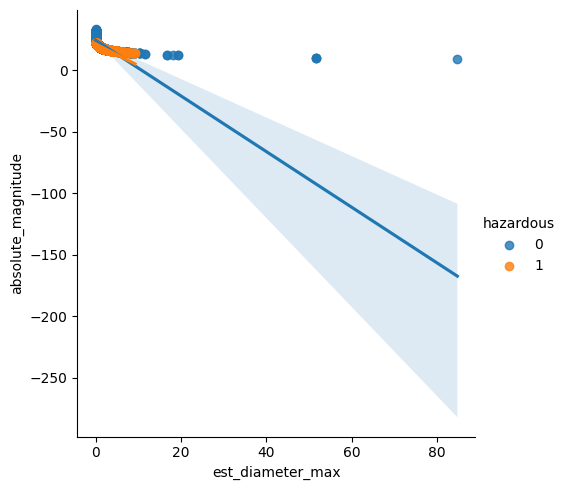

<Figure size 640x480 with 0 Axes>

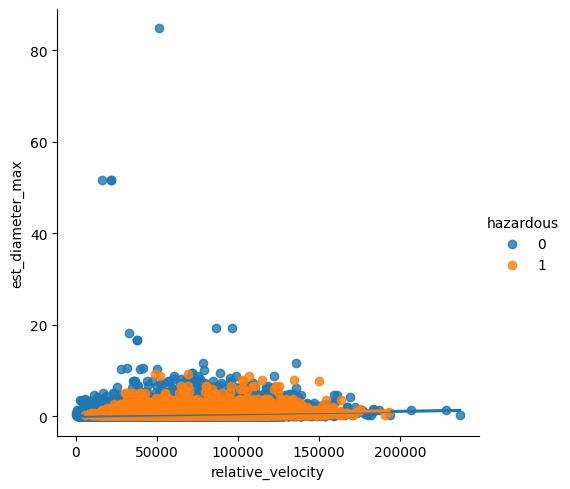

<Figure size 640x480 with 0 Axes>

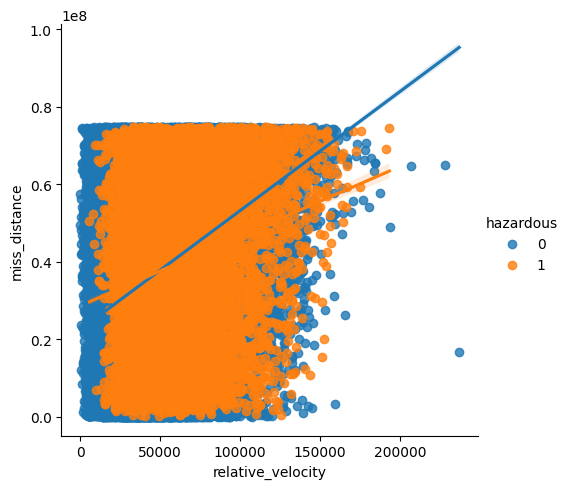

<Figure size 640x480 with 0 Axes>

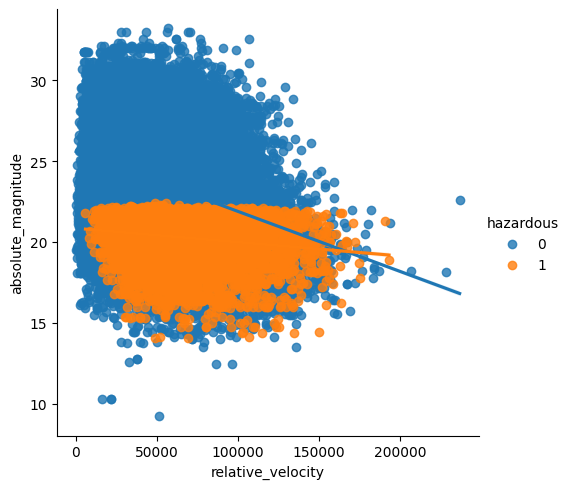

<Figure size 640x480 with 0 Axes>

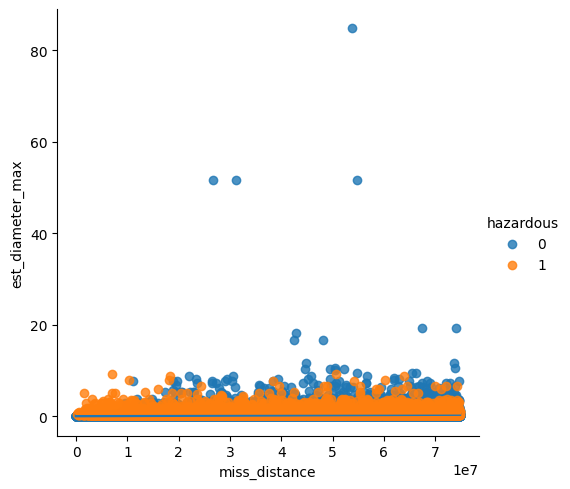

<Figure size 640x480 with 0 Axes>

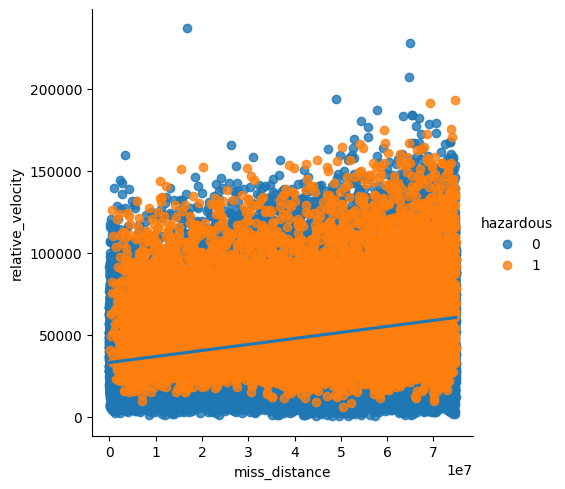

<Figure size 640x480 with 0 Axes>

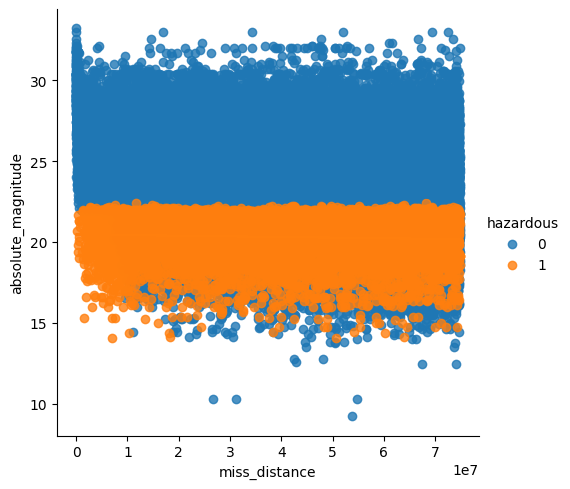

<Figure size 640x480 with 0 Axes>

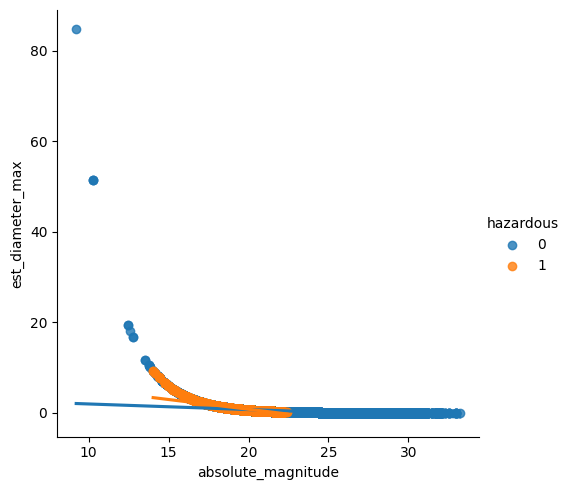

<Figure size 640x480 with 0 Axes>

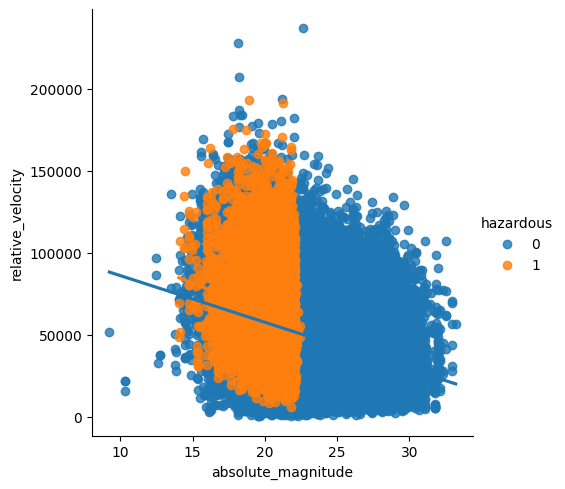

<Figure size 640x480 with 0 Axes>

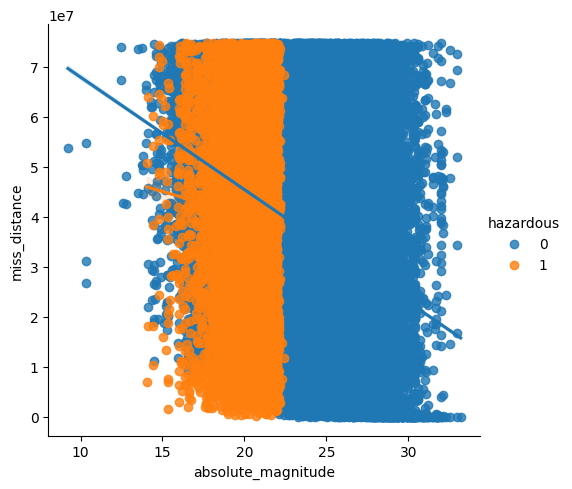

In [ ]:
num_vals = ['est_diameter_max','relative_velocity','miss_distance','absolute_magnitude']
for p in num_vals:
    for q in num_vals:
        if p != q:
            plt.figure()
            sns.lmplot(
                x = p,
                y = q,
                hue = 'hazardous',
                data = nasa
            )

##Model: Logistic Regression

In [ ]:
#Removing dpedent features
X_train_log = X_train.drop(['est_diameter_min', 'est_diameter_max'], axis=1).copy()
X_test_log = X_test.drop(['est_diameter_min', 'est_diameter_max'], axis=1).copy()

#Creating model
clf_logistic = LogisticRegression(solver='lbfgs').fit(X_train_log, np.ravel(y_train))

#prediction
y_train_pred = clf_logistic.predict(X_train_log)
y_test_pred = clf_logistic.predict(X_test_log)

#Classification report
print(classification_report(y_train, y_train_pred))
print(classification_report(y_test, y_test_pred))

#Accuracy score
print("Accuracy Score Train: {:.4f} \nAccuracy Score Test: {:.4f}".format(metrics.accuracy_score(y_train, y_train_pred), metrics.accuracy_score(y_test, y_test_pred)))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95     65612
           1       0.47      0.07      0.13      7056

    accuracy                           0.90     72668
   macro avg       0.69      0.53      0.54     72668
weighted avg       0.87      0.90      0.87     72668

              precision    recall  f1-score   support

           0       0.91      0.97      0.94     16384
           1       0.35      0.16      0.22      1784

    accuracy                           0.89     18168
   macro avg       0.63      0.57      0.58     18168
weighted avg       0.86      0.89      0.87     18168

Accuracy Score Train: 0.9021 
Accuracy Score Test: 0.8885


##Model: XGBoost

In [ ]:
import xgboost
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
import os

In [ ]:
xgboost.XGBClassifier().get_params()

{'objective': 'binary:logistic',
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'device': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'multi_strategy': None,
 'n_estimators': None,
 'n_jobs': None,
 'num_parallel_tree': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

##Creating Model

In [ ]:
xgb = xgboost.XGBClassifier(learning_rate=0.02,
                            max_depth=5,
                            n_estimators=1000,
                            subsample=0.5,
                            colsample_bytree=0.5,
                            scoring = 'f1',
                            eval_metric='auc',
                            verbosity=1)

evals = [(X_train, y_train), (X_test, y_test)]
xgb.fit(X_train, y_train, eval_set=evals, verbose=True)

[0]	validation_0-auc:0.90263	validation_1-auc:0.90018
[1]	validation_0-auc:0.90536	validation_1-auc:0.89946
[2]	validation_0-auc:0.91054	validation_1-auc:0.90436
[3]	validation_0-auc:0.91033	validation_1-auc:0.90256
[4]	validation_0-auc:0.91266	validation_1-auc:0.90399
[5]	validation_0-auc:0.91306	validation_1-auc:0.90392
[6]	validation_0-auc:0.91284	validation_1-auc:0.90388
[7]	validation_0-auc:0.91365	validation_1-auc:0.90491
[8]	validation_0-auc:0.91421	validation_1-auc:0.90600
[9]	validation_0-auc:0.91460	validation_1-auc:0.90660


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [07:04:31] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "scoring" } are not used.

  warnings.warn(smsg, UserWarning)


[10]	validation_0-auc:0.91455	validation_1-auc:0.90595
[11]	validation_0-auc:0.91481	validation_1-auc:0.90622
[12]	validation_0-auc:0.91495	validation_1-auc:0.90628
[13]	validation_0-auc:0.91512	validation_1-auc:0.90662
[14]	validation_0-auc:0.91516	validation_1-auc:0.90679
[15]	validation_0-auc:0.91514	validation_1-auc:0.90664
[16]	validation_0-auc:0.91523	validation_1-auc:0.90653
[17]	validation_0-auc:0.91531	validation_1-auc:0.90690
[18]	validation_0-auc:0.91545	validation_1-auc:0.90656
[19]	validation_0-auc:0.91581	validation_1-auc:0.90694
[20]	validation_0-auc:0.91635	validation_1-auc:0.90719
[21]	validation_0-auc:0.91622	validation_1-auc:0.90704
[22]	validation_0-auc:0.91644	validation_1-auc:0.90712
[23]	validation_0-auc:0.91647	validation_1-auc:0.90718
[24]	validation_0-auc:0.91641	validation_1-auc:0.90721
[25]	validation_0-auc:0.91652	validation_1-auc:0.90744
[26]	validation_0-auc:0.91650	validation_1-auc:0.90764
[27]	validation_0-auc:0.91658	validation_1-auc:0.90774
[28]	valid

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.02, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=1000, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
#prediction
y_train_pred = xgb.predict(X_train)
y_test_pred = xgb.predict(X_test)

#Classification report
print(classification_report(y_train, y_train_pred))
print(classification_report(y_test, y_test_pred))

#accuracy_score
accuracy = accuracy_score(y_train, y_train_pred)
accuracyt = accuracy_score(y_test, y_test_pred)
print("Train Accuracy:", accuracy)
print("Test Accuracy:", accuracyt)

              precision    recall  f1-score   support

           0       0.92      0.99      0.96     65612
           1       0.80      0.21      0.33      7056

    accuracy                           0.92     72668
   macro avg       0.86      0.60      0.65     72668
weighted avg       0.91      0.92      0.90     72668

              precision    recall  f1-score   support

           0       0.92      0.97      0.95     16384
           1       0.50      0.24      0.32      1784

    accuracy                           0.90     18168
   macro avg       0.71      0.61      0.63     18168
weighted avg       0.88      0.90      0.89     18168

Train Accuracy: 0.9182996642263445
Test Accuracy: 0.9013650374284456


##Hyperparameter Tuning

In [ ]:
learning_rate_list = [0.01, 0.02, 0.05, 0.1, 0.5, 1]
max_depth_list = [2,5,7,10]
n_estimators_list = [10, 200, 500, 1000, 2000]

params_dict = {"learning_rate": learning_rate_list,
               "max_depth": max_depth_list,
               "n_estimators": n_estimators_list
               }

num_combinations  = 1
for v in params_dict.values(): num_combinations *= len(v)
print(num_combinations)
params_dict

120


{'learning_rate': [0.01, 0.02, 0.05, 0.1, 0.5, 1],
 'max_depth': [2, 5, 7, 10],
 'n_estimators': [10, 200, 500, 1000, 2000]}

##Using F1 score

In [ ]:
def my_f1_score(model, X, y):
    y_pred = model.predict(X)
    return f1_score(y, y_pred)

xgb_hyper = GridSearchCV(estimator=xgboost.XGBClassifier(subsample=0.5,
                                                         colsample=0.25,
                                                         eval_metric='auc',
                                                         use_label_encoder=False),
                         param_grid=params_dict,
                         cv=2,
                         scoring=my_f1_score,
                         return_train_score=True,
                         verbose=4)

xgb_hyper.fit(X_train, y_train)

Fitting 2 folds for each of 120 candidates, totalling 240 fits
[CV 1/2] END learning_rate=0.01, max_depth=2, n_estimators=10;, score=(train=0.000, test=0.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [07:05:03] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [07:05:03] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/2] END learning_rate=0.01, max_depth=2, n_estimators=10;, score=(train=0.000, test=0.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [07:05:03] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/2] END learning_rate=0.01, max_depth=2, n_estimators=200;, score=(train=0.230, test=0.235) total time=   0.5s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [07:05:03] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/2] END learning_rate=0.01, max_depth=2, n_estimators=200;, score=(train=0.221, test=0.211) total time=   0.5s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [07:05:04] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/2] END learning_rate=0.01, max_depth=2, n_estimators=500;, score=(train=0.244, test=0.248) total time=   1.1s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [07:05:05] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/2] END learning_rate=0.01, max_depth=2, n_estimators=500;, score=(train=0.231, test=0.222) total time=   1.1s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [07:05:06] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/2] END learning_rate=0.01, max_depth=2, n_estimators=1000;, score=(train=0.262, test=0.262) total time=   2.0s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [07:05:09] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/2] END learning_rate=0.01, max_depth=2, n_estimators=1000;, score=(train=0.261, test=0.249) total time=   2.1s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [07:05:11] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/2] END learning_rate=0.01, max_depth=2, n_estimators=2000;, score=(train=0.269, test=0.268) total time=   8.6s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [07:05:20] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/2] END learning_rate=0.01, max_depth=2, n_estimators=2000;, score=(train=0.281, test=0.259) total time=   3.9s
[CV 1/2] END learning_rate=0.01, max_depth=5, n_estimators=10;, score=(train=0.000, test=0.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [07:05:24] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [07:05:24] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/2] END learning_rate=0.01, max_depth=5, n_estimators=10;, score=(train=0.000, test=0.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [07:05:24] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/2] END learning_rate=0.01, max_depth=5, n_estimators=200;, score=(train=0.233, test=0.232) total time=   0.6s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [07:05:25] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/2] END learning_rate=0.01, max_depth=5, n_estimators=200;, score=(train=0.226, test=0.215) total time=   0.6s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [07:05:26] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/2] END learning_rate=0.01, max_depth=5, n_estimators=500;, score=(train=0.267, test=0.261) total time=   1.4s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [07:05:27] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/2] END learning_rate=0.01, max_depth=5, n_estimators=500;, score=(train=0.279, test=0.256) total time=   6.0s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [07:05:34] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/2] END learning_rate=0.01, max_depth=5, n_estimators=1000;, score=(train=0.310, test=0.280) total time=   3.0s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [07:05:37] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/2] END learning_rate=0.01, max_depth=5, n_estimators=1000;, score=(train=0.308, test=0.269) total time=   3.0s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [07:05:41] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/2] END learning_rate=0.01, max_depth=5, n_estimators=2000;, score=(train=0.401, test=0.327) total time=  11.1s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [07:05:53] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/2] END learning_rate=0.01, max_depth=5, n_estimators=2000;, score=(train=0.391, test=0.303) total time=   6.4s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [07:06:01] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/2] END learning_rate=0.01, max_depth=7, n_estimators=10;, score=(train=0.000, test=0.000) total time=   0.6s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [07:06:01] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/2] END learning_rate=0.01, max_depth=7, n_estimators=10;, score=(train=0.000, test=0.000) total time=   0.4s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [07:06:02] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/2] END learning_rate=0.01, max_depth=7, n_estimators=200;, score=(train=0.248, test=0.239) total time=   2.7s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [07:06:05] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/2] END learning_rate=0.01, max_depth=7, n_estimators=200;, score=(train=0.249, test=0.224) total time=   1.8s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [07:06:06] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/2] END learning_rate=0.01, max_depth=7, n_estimators=500;, score=(train=0.304, test=0.274) total time=   1.8s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [07:06:08] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/2] END learning_rate=0.01, max_depth=7, n_estimators=500;, score=(train=0.305, test=0.264) total time=   1.8s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [07:06:10] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/2] END learning_rate=0.01, max_depth=7, n_estimators=1000;, score=(train=0.395, test=0.317) total time=   3.9s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [07:06:15] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/2] END learning_rate=0.01, max_depth=7, n_estimators=1000;, score=(train=0.390, test=0.295) total time=   8.6s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [07:06:24] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/2] END learning_rate=0.01, max_depth=7, n_estimators=2000;, score=(train=0.583, test=0.369) total time=  10.2s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [07:06:37] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/2] END learning_rate=0.01, max_depth=7, n_estimators=2000;, score=(train=0.566, test=0.349) total time=   9.6s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [07:06:49] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/2] END learning_rate=0.01, max_depth=10, n_estimators=10;, score=(train=0.000, test=0.000) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [07:06:49] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/2] END learning_rate=0.01, max_depth=10, n_estimators=10;, score=(train=0.000, test=0.000) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [07:06:50] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/2] END learning_rate=0.01, max_depth=10, n_estimators=200;, score=(train=0.279, test=0.248) total time=   4.9s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [07:06:54] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/2] END learning_rate=0.01, max_depth=10, n_estimators=200;, score=(train=0.283, test=0.239) total time=   1.1s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [07:06:56] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/2] END learning_rate=0.01, max_depth=10, n_estimators=500;, score=(train=0.409, test=0.307) total time=   2.6s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [07:06:59] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/2] END learning_rate=0.01, max_depth=10, n_estimators=500;, score=(train=0.409, test=0.295) total time=   2.7s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [07:07:02] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/2] END learning_rate=0.01, max_depth=10, n_estimators=1000;, score=(train=0.612, test=0.366) total time=  10.7s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [07:07:13] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/2] END learning_rate=0.01, max_depth=10, n_estimators=1000;, score=(train=0.599, test=0.343) total time=   6.1s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [07:07:21] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/2] END learning_rate=0.01, max_depth=10, n_estimators=2000;, score=(train=0.814, test=0.397) total time=  21.0s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [07:07:45] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/2] END learning_rate=0.01, max_depth=10, n_estimators=2000;, score=(train=0.811, test=0.390) total time=  19.1s
[CV 1/2] END learning_rate=0.02, max_depth=2, n_estimators=10;, score=(train=0.000, test=0.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [07:08:07] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [07:08:07] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/2] END learning_rate=0.02, max_depth=2, n_estimators=10;, score=(train=0.000, test=0.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [07:08:07] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/2] END learning_rate=0.02, max_depth=2, n_estimators=200;, score=(train=0.238, test=0.243) total time=   0.5s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [07:08:08] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/2] END learning_rate=0.02, max_depth=2, n_estimators=200;, score=(train=0.227, test=0.218) total time=   0.6s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [07:08:09] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/2] END learning_rate=0.02, max_depth=2, n_estimators=500;, score=(train=0.262, test=0.263) total time=   5.2s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [07:08:14] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/2] END learning_rate=0.02, max_depth=2, n_estimators=500;, score=(train=0.265, test=0.252) total time=   1.2s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [07:08:15] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/2] END learning_rate=0.02, max_depth=2, n_estimators=1000;, score=(train=0.271, test=0.268) total time=   2.0s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [07:08:17] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/2] END learning_rate=0.02, max_depth=2, n_estimators=1000;, score=(train=0.279, test=0.256) total time=   2.0s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [07:08:20] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/2] END learning_rate=0.02, max_depth=2, n_estimators=2000;, score=(train=0.292, test=0.285) total time=   3.9s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [07:08:24] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/2] END learning_rate=0.02, max_depth=2, n_estimators=2000;, score=(train=0.297, test=0.271) total time=   8.4s
[CV 1/2] END learning_rate=0.02, max_depth=5, n_estimators=10;, score=(train=0.000, test=0.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [07:08:33] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [07:08:33] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/2] END learning_rate=0.02, max_depth=5, n_estimators=10;, score=(train=0.000, test=0.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [07:08:33] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/2] END learning_rate=0.02, max_depth=5, n_estimators=200;, score=(train=0.264, test=0.256) total time=   0.6s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [07:08:34] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/2] END learning_rate=0.02, max_depth=5, n_estimators=200;, score=(train=0.267, test=0.247) total time=   0.6s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [07:08:35] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/2] END learning_rate=0.02, max_depth=5, n_estimators=500;, score=(train=0.313, test=0.279) total time=   1.6s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [07:08:36] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/2] END learning_rate=0.02, max_depth=5, n_estimators=500;, score=(train=0.307, test=0.266) total time=   1.5s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [07:08:38] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/2] END learning_rate=0.02, max_depth=5, n_estimators=1000;, score=(train=0.407, test=0.327) total time=   7.8s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [07:08:46] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/2] END learning_rate=0.02, max_depth=5, n_estimators=1000;, score=(train=0.384, test=0.300) total time=   3.3s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [07:08:50] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/2] END learning_rate=0.02, max_depth=5, n_estimators=2000;, score=(train=0.538, test=0.370) total time=   7.4s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [07:09:00] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/2] END learning_rate=0.02, max_depth=5, n_estimators=2000;, score=(train=0.526, test=0.342) total time=   8.9s
[CV 1/2] END learning_rate=0.02, max_depth=7, n_estimators=10;, score=(train=0.000, test=0.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [07:09:09] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [07:09:10] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/2] END learning_rate=0.02, max_depth=7, n_estimators=10;, score=(train=0.000, test=0.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [07:09:10] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/2] END learning_rate=0.02, max_depth=7, n_estimators=200;, score=(train=0.295, test=0.264) total time=   0.8s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [07:09:11] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/2] END learning_rate=0.02, max_depth=7, n_estimators=200;, score=(train=0.297, test=0.260) total time=   0.8s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [07:09:11] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/2] END learning_rate=0.02, max_depth=7, n_estimators=500;, score=(train=0.395, test=0.310) total time=   5.4s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [07:09:18] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/2] END learning_rate=0.02, max_depth=7, n_estimators=500;, score=(train=0.392, test=0.300) total time=   2.8s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [07:09:21] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/2] END learning_rate=0.02, max_depth=7, n_estimators=1000;, score=(train=0.581, test=0.368) total time=   4.4s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [07:09:26] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/2] END learning_rate=0.02, max_depth=7, n_estimators=1000;, score=(train=0.573, test=0.350) total time=   8.3s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [07:09:35] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/2] END learning_rate=0.02, max_depth=7, n_estimators=2000;, score=(train=0.757, test=0.401) total time=   9.5s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [07:09:48] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/2] END learning_rate=0.02, max_depth=7, n_estimators=2000;, score=(train=0.755, test=0.385) total time=  12.1s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [07:10:02] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/2] END learning_rate=0.02, max_depth=10, n_estimators=10;, score=(train=0.000, test=0.000) total time=   0.7s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [07:10:03] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/2] END learning_rate=0.02, max_depth=10, n_estimators=10;, score=(train=0.000, test=0.000) total time=   0.4s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [07:10:04] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/2] END learning_rate=0.02, max_depth=10, n_estimators=200;, score=(train=0.367, test=0.293) total time=   3.9s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [07:10:08] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/2] END learning_rate=0.02, max_depth=10, n_estimators=200;, score=(train=0.370, test=0.284) total time=   1.1s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [07:10:09] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/2] END learning_rate=0.02, max_depth=10, n_estimators=500;, score=(train=0.605, test=0.369) total time=   3.0s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [07:10:12] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/2] END learning_rate=0.02, max_depth=10, n_estimators=500;, score=(train=0.607, test=0.350) total time=   3.1s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [07:10:16] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/2] END learning_rate=0.02, max_depth=10, n_estimators=1000;, score=(train=0.815, test=0.397) total time=  11.6s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [07:10:29] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/2] END learning_rate=0.02, max_depth=10, n_estimators=1000;, score=(train=0.811, test=0.388) total time=  11.8s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [07:10:42] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/2] END learning_rate=0.02, max_depth=10, n_estimators=2000;, score=(train=0.951, test=0.427) total time=  19.8s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [07:11:06] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/2] END learning_rate=0.02, max_depth=10, n_estimators=2000;, score=(train=0.952, test=0.411) total time=  23.4s
[CV 1/2] END learning_rate=0.05, max_depth=2, n_estimators=10;, score=(train=0.000, test=0.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [07:11:32] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [07:11:32] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/2] END learning_rate=0.05, max_depth=2, n_estimators=10;, score=(train=0.000, test=0.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [07:11:32] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/2] END learning_rate=0.05, max_depth=2, n_estimators=200;, score=(train=0.264, test=0.265) total time=   0.5s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [07:11:33] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/2] END learning_rate=0.05, max_depth=2, n_estimators=200;, score=(train=0.265, test=0.256) total time=   0.5s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [07:11:33] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/2] END learning_rate=0.05, max_depth=2, n_estimators=500;, score=(train=0.274, test=0.269) total time=   1.0s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [07:11:34] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/2] END learning_rate=0.05, max_depth=2, n_estimators=500;, score=(train=0.286, test=0.263) total time=   1.1s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [07:11:36] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/2] END learning_rate=0.05, max_depth=2, n_estimators=1000;, score=(train=0.303, test=0.287) total time=   6.6s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [07:11:42] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/2] END learning_rate=0.05, max_depth=2, n_estimators=1000;, score=(train=0.300, test=0.274) total time=   2.0s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [07:11:45] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/2] END learning_rate=0.05, max_depth=2, n_estimators=2000;, score=(train=0.341, test=0.306) total time=   3.9s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [07:11:49] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/2] END learning_rate=0.05, max_depth=2, n_estimators=2000;, score=(train=0.327, test=0.293) total time=   8.5s
[CV 1/2] END learning_rate=0.05, max_depth=5, n_estimators=10;, score=(train=0.000, test=0.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [07:11:58] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [07:11:58] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/2] END learning_rate=0.05, max_depth=5, n_estimators=10;, score=(train=0.000, test=0.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [07:11:58] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/2] END learning_rate=0.05, max_depth=5, n_estimators=200;, score=(train=0.317, test=0.285) total time=   0.7s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [07:11:59] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/2] END learning_rate=0.05, max_depth=5, n_estimators=200;, score=(train=0.311, test=0.269) total time=   0.7s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [07:12:00] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/2] END learning_rate=0.05, max_depth=5, n_estimators=500;, score=(train=0.438, test=0.342) total time=   1.7s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [07:12:02] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/2] END learning_rate=0.05, max_depth=5, n_estimators=500;, score=(train=0.432, test=0.316) total time=   1.7s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [07:12:04] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/2] END learning_rate=0.05, max_depth=5, n_estimators=1000;, score=(train=0.594, test=0.383) total time=   3.6s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [07:12:08] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/2] END learning_rate=0.05, max_depth=5, n_estimators=1000;, score=(train=0.568, test=0.362) total time=   7.0s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [07:12:16] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/2] END learning_rate=0.05, max_depth=5, n_estimators=2000;, score=(train=0.730, test=0.413) total time=   6.9s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [07:12:25] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/2] END learning_rate=0.05, max_depth=5, n_estimators=2000;, score=(train=0.721, test=0.388) total time=  10.5s
[CV 1/2] END learning_rate=0.05, max_depth=7, n_estimators=10;, score=(train=0.000, test=0.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [07:12:36] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [07:12:36] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/2] END learning_rate=0.05, max_depth=7, n_estimators=10;, score=(train=0.000, test=0.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [07:12:37] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/2] END learning_rate=0.05, max_depth=7, n_estimators=200;, score=(train=0.407, test=0.316) total time=   0.9s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [07:12:38] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/2] END learning_rate=0.05, max_depth=7, n_estimators=200;, score=(train=0.392, test=0.296) total time=   0.9s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [07:12:39] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/2] END learning_rate=0.05, max_depth=7, n_estimators=500;, score=(train=0.631, test=0.380) total time=   7.0s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [07:12:46] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/2] END learning_rate=0.05, max_depth=7, n_estimators=500;, score=(train=0.631, test=0.369) total time=   2.4s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [07:12:49] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/2] END learning_rate=0.05, max_depth=7, n_estimators=1000;, score=(train=0.815, test=0.417) total time=   4.8s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [07:12:54] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/2] END learning_rate=0.05, max_depth=7, n_estimators=1000;, score=(train=0.807, test=0.398) total time=   9.5s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [07:13:05] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/2] END learning_rate=0.05, max_depth=7, n_estimators=2000;, score=(train=0.942, test=0.431) total time=  14.8s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [07:13:21] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/2] END learning_rate=0.05, max_depth=7, n_estimators=2000;, score=(train=0.943, test=0.414) total time=  14.7s
[CV 1/2] END learning_rate=0.05, max_depth=10, n_estimators=10;, score=(train=0.000, test=0.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [07:13:38] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [07:13:38] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/2] END learning_rate=0.05, max_depth=10, n_estimators=10;, score=(train=0.000, test=0.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [07:13:38] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/2] END learning_rate=0.05, max_depth=10, n_estimators=200;, score=(train=0.606, test=0.369) total time=   1.3s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [07:13:40] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/2] END learning_rate=0.05, max_depth=10, n_estimators=200;, score=(train=0.596, test=0.339) total time=   1.3s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [07:13:41] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/2] END learning_rate=0.05, max_depth=10, n_estimators=500;, score=(train=0.862, test=0.414) total time=   8.2s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [07:13:50] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/2] END learning_rate=0.05, max_depth=10, n_estimators=500;, score=(train=0.867, test=0.395) total time=   3.6s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [07:13:55] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/2] END learning_rate=0.05, max_depth=10, n_estimators=1000;, score=(train=0.975, test=0.429) total time=  12.3s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [07:14:08] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/2] END learning_rate=0.05, max_depth=10, n_estimators=1000;, score=(train=0.976, test=0.409) total time=  12.4s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [07:14:22] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/2] END learning_rate=0.05, max_depth=10, n_estimators=2000;, score=(train=0.998, test=0.431) total time=  20.4s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [07:14:47] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/2] END learning_rate=0.05, max_depth=10, n_estimators=2000;, score=(train=0.998, test=0.409) total time=  24.1s
[CV 1/2] END learning_rate=0.1, max_depth=2, n_estimators=10;, score=(train=0.192, test=0.204) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [07:15:14] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [07:15:14] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/2] END learning_rate=0.1, max_depth=2, n_estimators=10;, score=(train=0.215, test=0.203) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [07:15:14] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/2] END learning_rate=0.1, max_depth=2, n_estimators=200;, score=(train=0.274, test=0.270) total time=   0.5s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [07:15:15] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/2] END learning_rate=0.1, max_depth=2, n_estimators=200;, score=(train=0.284, test=0.265) total time=   0.5s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [07:15:15] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/2] END learning_rate=0.1, max_depth=2, n_estimators=500;, score=(train=0.294, test=0.287) total time=   1.1s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [07:15:17] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/2] END learning_rate=0.1, max_depth=2, n_estimators=500;, score=(train=0.303, test=0.275) total time=   3.6s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [07:15:21] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/2] END learning_rate=0.1, max_depth=2, n_estimators=1000;, score=(train=0.342, test=0.308) total time=   3.8s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [07:15:24] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/2] END learning_rate=0.1, max_depth=2, n_estimators=1000;, score=(train=0.325, test=0.291) total time=   2.0s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [07:15:27] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/2] END learning_rate=0.1, max_depth=2, n_estimators=2000;, score=(train=0.389, test=0.338) total time=   3.9s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [07:15:31] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/2] END learning_rate=0.1, max_depth=2, n_estimators=2000;, score=(train=0.370, test=0.317) total time=   8.6s
[CV 1/2] END learning_rate=0.1, max_depth=5, n_estimators=10;, score=(train=0.199, test=0.193) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [07:15:40] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [07:15:40] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/2] END learning_rate=0.1, max_depth=5, n_estimators=10;, score=(train=0.208, test=0.197) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [07:15:40] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/2] END learning_rate=0.1, max_depth=5, n_estimators=200;, score=(train=0.416, test=0.331) total time=   0.7s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [07:15:41] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/2] END learning_rate=0.1, max_depth=5, n_estimators=200;, score=(train=0.395, test=0.309) total time=   0.7s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [07:15:42] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/2] END learning_rate=0.1, max_depth=5, n_estimators=500;, score=(train=0.583, test=0.373) total time=   1.7s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [07:15:44] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/2] END learning_rate=0.1, max_depth=5, n_estimators=500;, score=(train=0.577, test=0.363) total time=   1.8s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [07:15:46] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/2] END learning_rate=0.1, max_depth=5, n_estimators=1000;, score=(train=0.724, test=0.414) total time=   5.8s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [07:15:53] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/2] END learning_rate=0.1, max_depth=5, n_estimators=1000;, score=(train=0.719, test=0.392) total time=   5.1s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [07:15:58] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/2] END learning_rate=0.1, max_depth=5, n_estimators=2000;, score=(train=0.855, test=0.432) total time=   7.7s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [07:16:08] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/2] END learning_rate=0.1, max_depth=5, n_estimators=2000;, score=(train=0.846, test=0.415) total time=   9.6s
[CV 1/2] END learning_rate=0.1, max_depth=7, n_estimators=10;, score=(train=0.204, test=0.195) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [07:16:19] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [07:16:19] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/2] END learning_rate=0.1, max_depth=7, n_estimators=10;, score=(train=0.214, test=0.200) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [07:16:19] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/2] END learning_rate=0.1, max_depth=7, n_estimators=200;, score=(train=0.589, test=0.378) total time=   1.0s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [07:16:20] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/2] END learning_rate=0.1, max_depth=7, n_estimators=200;, score=(train=0.569, test=0.348) total time=   1.0s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [07:16:22] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/2] END learning_rate=0.1, max_depth=7, n_estimators=500;, score=(train=0.807, test=0.414) total time=   6.9s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [07:16:29] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/2] END learning_rate=0.1, max_depth=7, n_estimators=500;, score=(train=0.803, test=0.397) total time=   2.5s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [07:16:32] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/2] END learning_rate=0.1, max_depth=7, n_estimators=1000;, score=(train=0.932, test=0.430) total time=   5.0s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [07:16:38] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/2] END learning_rate=0.1, max_depth=7, n_estimators=1000;, score=(train=0.937, test=0.413) total time=   9.2s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [07:16:48] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/2] END learning_rate=0.1, max_depth=7, n_estimators=2000;, score=(train=0.991, test=0.433) total time=  15.2s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [07:17:06] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/2] END learning_rate=0.1, max_depth=7, n_estimators=2000;, score=(train=0.994, test=0.420) total time=  15.3s
[CV 1/2] END learning_rate=0.1, max_depth=10, n_estimators=10;, score=(train=0.200, test=0.192) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [07:17:23] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [07:17:23] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/2] END learning_rate=0.1, max_depth=10, n_estimators=10;, score=(train=0.225, test=0.212) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [07:17:23] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/2] END learning_rate=0.1, max_depth=10, n_estimators=200;, score=(train=0.809, test=0.406) total time=   1.5s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [07:17:25] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/2] END learning_rate=0.1, max_depth=10, n_estimators=200;, score=(train=0.804, test=0.386) total time=   6.1s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [07:17:31] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/2] END learning_rate=0.1, max_depth=10, n_estimators=500;, score=(train=0.971, test=0.429) total time=   3.8s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [07:17:36] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/2] END learning_rate=0.1, max_depth=10, n_estimators=500;, score=(train=0.973, test=0.414) total time=   3.8s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [07:17:40] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/2] END learning_rate=0.1, max_depth=10, n_estimators=1000;, score=(train=0.998, test=0.431) total time=  12.7s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [07:17:55] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/2] END learning_rate=0.1, max_depth=10, n_estimators=1000;, score=(train=0.998, test=0.416) total time=  12.5s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [07:18:09] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/2] END learning_rate=0.1, max_depth=10, n_estimators=2000;, score=(train=0.999, test=0.431) total time=  20.5s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [07:18:35] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/2] END learning_rate=0.1, max_depth=10, n_estimators=2000;, score=(train=0.998, test=0.415) total time=  19.9s
[CV 1/2] END learning_rate=0.5, max_depth=2, n_estimators=10;, score=(train=0.231, test=0.235) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [07:18:58] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [07:18:58] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/2] END learning_rate=0.5, max_depth=2, n_estimators=10;, score=(train=0.227, test=0.219) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [07:18:58] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/2] END learning_rate=0.5, max_depth=2, n_estimators=200;, score=(train=0.372, test=0.326) total time=   0.5s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [07:18:59] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/2] END learning_rate=0.5, max_depth=2, n_estimators=200;, score=(train=0.340, test=0.296) total time=   0.5s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [07:18:59] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/2] END learning_rate=0.5, max_depth=2, n_estimators=500;, score=(train=0.415, test=0.346) total time=   1.0s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [07:19:01] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/2] END learning_rate=0.5, max_depth=2, n_estimators=500;, score=(train=0.409, test=0.336) total time=   5.2s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [07:19:06] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/2] END learning_rate=0.5, max_depth=2, n_estimators=1000;, score=(train=0.477, test=0.365) total time=   2.3s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [07:19:08] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/2] END learning_rate=0.5, max_depth=2, n_estimators=1000;, score=(train=0.446, test=0.345) total time=   2.0s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [07:19:11] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/2] END learning_rate=0.5, max_depth=2, n_estimators=2000;, score=(train=0.540, test=0.391) total time=   3.9s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [07:19:15] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/2] END learning_rate=0.5, max_depth=2, n_estimators=2000;, score=(train=0.520, test=0.371) total time=   8.6s
[CV 1/2] END learning_rate=0.5, max_depth=5, n_estimators=10;, score=(train=0.284, test=0.272) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [07:19:24] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [07:19:24] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/2] END learning_rate=0.5, max_depth=5, n_estimators=10;, score=(train=0.289, test=0.274) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [07:19:24] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/2] END learning_rate=0.5, max_depth=5, n_estimators=200;, score=(train=0.684, test=0.410) total time=   0.8s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [07:19:25] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/2] END learning_rate=0.5, max_depth=5, n_estimators=200;, score=(train=0.681, test=0.410) total time=   0.8s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [07:19:26] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/2] END learning_rate=0.5, max_depth=5, n_estimators=500;, score=(train=0.842, test=0.423) total time=   1.9s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [07:19:28] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/2] END learning_rate=0.5, max_depth=5, n_estimators=500;, score=(train=0.846, test=0.428) total time=   1.9s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [07:19:31] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/2] END learning_rate=0.5, max_depth=5, n_estimators=1000;, score=(train=0.950, test=0.438) total time=   8.5s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [07:19:40] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/2] END learning_rate=0.5, max_depth=5, n_estimators=1000;, score=(train=0.948, test=0.430) total time=   3.8s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [07:19:44] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/2] END learning_rate=0.5, max_depth=5, n_estimators=2000;, score=(train=0.996, test=0.441) total time=  12.4s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [07:19:57] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/2] END learning_rate=0.5, max_depth=5, n_estimators=2000;, score=(train=0.996, test=0.423) total time=  11.6s
[CV 1/2] END learning_rate=0.5, max_depth=7, n_estimators=10;, score=(train=0.363, test=0.310) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [07:20:11] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [07:20:11] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/2] END learning_rate=0.5, max_depth=7, n_estimators=10;, score=(train=0.357, test=0.313) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [07:20:11] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/2] END learning_rate=0.5, max_depth=7, n_estimators=200;, score=(train=0.890, test=0.423) total time=   1.1s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [07:20:12] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/2] END learning_rate=0.5, max_depth=7, n_estimators=200;, score=(train=0.892, test=0.408) total time=   1.1s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [07:20:13] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/2] END learning_rate=0.5, max_depth=7, n_estimators=500;, score=(train=0.992, test=0.434) total time=   2.7s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [07:20:17] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/2] END learning_rate=0.5, max_depth=7, n_estimators=500;, score=(train=0.992, test=0.417) total time=   2.8s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [07:20:20] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/2] END learning_rate=0.5, max_depth=7, n_estimators=1000;, score=(train=0.999, test=0.438) total time=   9.8s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [07:20:31] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/2] END learning_rate=0.5, max_depth=7, n_estimators=1000;, score=(train=0.998, test=0.418) total time=   5.8s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [07:20:38] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/2] END learning_rate=0.5, max_depth=7, n_estimators=2000;, score=(train=0.999, test=0.436) total time=  13.3s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [07:20:55] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/2] END learning_rate=0.5, max_depth=7, n_estimators=2000;, score=(train=0.998, test=0.421) total time=  13.2s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [07:21:12] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/2] END learning_rate=0.5, max_depth=10, n_estimators=10;, score=(train=0.482, test=0.351) total time=   0.8s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [07:21:12] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/2] END learning_rate=0.5, max_depth=10, n_estimators=10;, score=(train=0.473, test=0.344) total time=   0.4s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [07:21:13] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/2] END learning_rate=0.5, max_depth=10, n_estimators=200;, score=(train=0.994, test=0.430) total time=   3.2s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [07:21:16] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/2] END learning_rate=0.5, max_depth=10, n_estimators=200;, score=(train=0.993, test=0.426) total time=   1.6s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [07:21:18] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/2] END learning_rate=0.5, max_depth=10, n_estimators=500;, score=(train=0.999, test=0.430) total time=   3.8s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [07:21:23] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/2] END learning_rate=0.5, max_depth=10, n_estimators=500;, score=(train=0.998, test=0.418) total time=   7.7s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [07:21:31] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/2] END learning_rate=0.5, max_depth=10, n_estimators=1000;, score=(train=0.999, test=0.431) total time=   7.0s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [07:21:40] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/2] END learning_rate=0.5, max_depth=10, n_estimators=1000;, score=(train=0.998, test=0.423) total time=  12.3s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [07:21:53] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/2] END learning_rate=0.5, max_depth=10, n_estimators=2000;, score=(train=0.999, test=0.434) total time=  17.2s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [07:22:14] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/2] END learning_rate=0.5, max_depth=10, n_estimators=2000;, score=(train=0.998, test=0.425) total time=  18.2s
[CV 1/2] END learning_rate=1, max_depth=2, n_estimators=10;, score=(train=0.247, test=0.246) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [07:22:36] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [07:22:37] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/2] END learning_rate=1, max_depth=2, n_estimators=10;, score=(train=0.322, test=0.312) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [07:22:37] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/2] END learning_rate=1, max_depth=2, n_estimators=200;, score=(train=0.393, test=0.346) total time=   0.5s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [07:22:37] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/2] END learning_rate=1, max_depth=2, n_estimators=200;, score=(train=0.397, test=0.334) total time=   0.5s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [07:22:38] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/2] END learning_rate=1, max_depth=2, n_estimators=500;, score=(train=0.473, test=0.372) total time=   1.1s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [07:22:39] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/2] END learning_rate=1, max_depth=2, n_estimators=500;, score=(train=0.456, test=0.361) total time=   1.1s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [07:22:40] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/2] END learning_rate=1, max_depth=2, n_estimators=1000;, score=(train=0.524, test=0.389) total time=   2.0s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [07:22:42] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/2] END learning_rate=1, max_depth=2, n_estimators=1000;, score=(train=0.510, test=0.378) total time=   2.0s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [07:22:45] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/2] END learning_rate=1, max_depth=2, n_estimators=2000;, score=(train=0.588, test=0.408) total time=   8.6s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [07:22:54] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/2] END learning_rate=1, max_depth=2, n_estimators=2000;, score=(train=0.590, test=0.397) total time=   4.0s
[CV 1/2] END learning_rate=1, max_depth=5, n_estimators=10;, score=(train=0.357, test=0.312) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [07:22:58] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [07:22:58] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/2] END learning_rate=1, max_depth=5, n_estimators=10;, score=(train=0.365, test=0.320) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [07:22:58] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/2] END learning_rate=1, max_depth=5, n_estimators=200;, score=(train=0.723, test=0.422) total time=   0.9s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [07:22:59] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/2] END learning_rate=1, max_depth=5, n_estimators=200;, score=(train=0.722, test=0.419) total time=   0.8s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [07:23:00] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/2] END learning_rate=1, max_depth=5, n_estimators=500;, score=(train=0.868, test=0.429) total time=   2.0s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [07:23:03] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/2] END learning_rate=1, max_depth=5, n_estimators=500;, score=(train=0.876, test=0.418) total time=   6.5s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [07:23:09] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/2] END learning_rate=1, max_depth=5, n_estimators=1000;, score=(train=0.978, test=0.429) total time=   4.0s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [07:23:14] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/2] END learning_rate=1, max_depth=5, n_estimators=1000;, score=(train=0.979, test=0.424) total time=   3.9s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [07:23:19] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/2] END learning_rate=1, max_depth=5, n_estimators=2000;, score=(train=0.999, test=0.429) total time=  12.2s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [07:23:32] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/2] END learning_rate=1, max_depth=5, n_estimators=2000;, score=(train=0.998, test=0.425) total time=  12.5s
[CV 1/2] END learning_rate=1, max_depth=7, n_estimators=10;, score=(train=0.460, test=0.352) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [07:23:46] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [07:23:46] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/2] END learning_rate=1, max_depth=7, n_estimators=10;, score=(train=0.455, test=0.352) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [07:23:46] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/2] END learning_rate=1, max_depth=7, n_estimators=200;, score=(train=0.916, test=0.432) total time=   1.2s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [07:23:47] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/2] END learning_rate=1, max_depth=7, n_estimators=200;, score=(train=0.926, test=0.411) total time=   1.2s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [07:23:49] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/2] END learning_rate=1, max_depth=7, n_estimators=500;, score=(train=0.998, test=0.439) total time=   7.5s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [07:23:57] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/2] END learning_rate=1, max_depth=7, n_estimators=500;, score=(train=0.998, test=0.416) total time=   2.9s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [07:24:00] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/2] END learning_rate=1, max_depth=7, n_estimators=1000;, score=(train=0.999, test=0.431) total time=   5.4s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [07:24:07] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/2] END learning_rate=1, max_depth=7, n_estimators=1000;, score=(train=0.998, test=0.420) total time=   8.9s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [07:24:17] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/2] END learning_rate=1, max_depth=7, n_estimators=2000;, score=(train=0.999, test=0.432) total time=  14.5s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [07:24:33] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/2] END learning_rate=1, max_depth=7, n_estimators=2000;, score=(train=0.998, test=0.413) total time=  14.8s
[CV 1/2] END learning_rate=1, max_depth=10, n_estimators=10;, score=(train=0.595, test=0.395) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [07:24:50] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [07:24:50] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/2] END learning_rate=1, max_depth=10, n_estimators=10;, score=(train=0.567, test=0.394) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [07:24:50] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/2] END learning_rate=1, max_depth=10, n_estimators=200;, score=(train=0.998, test=0.422) total time=   1.7s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [07:24:52] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/2] END learning_rate=1, max_depth=10, n_estimators=200;, score=(train=0.997, test=0.415) total time=   6.0s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [07:24:59] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/2] END learning_rate=1, max_depth=10, n_estimators=500;, score=(train=0.999, test=0.426) total time=   3.6s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [07:25:03] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/2] END learning_rate=1, max_depth=10, n_estimators=500;, score=(train=0.998, test=0.409) total time=   3.6s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [07:25:07] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/2] END learning_rate=1, max_depth=10, n_estimators=1000;, score=(train=0.999, test=0.437) total time=  10.9s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [07:25:19] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/2] END learning_rate=1, max_depth=10, n_estimators=1000;, score=(train=0.998, test=0.414) total time=   7.7s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [07:25:29] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/2] END learning_rate=1, max_depth=10, n_estimators=2000;, score=(train=0.999, test=0.431) total time=  13.1s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [07:25:47] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/2] END learning_rate=1, max_depth=10, n_estimators=2000;, score=(train=0.998, test=0.419) total time=  13.0s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [07:26:04] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


GridSearchCV(cv=2,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample=0.25,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='auc', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     lea...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             param_grid={'learning_rate': [0.01, 0.02, 0.05, 0.1, 0.5, 1],
                         'max_depth': [2, 5, 7, 10],
                         'n_estimators': [10, 200, 500, 1000, 2000]},
             return_train_score=True,
             scoring=<function my_f1_score at 0x7e0903c5a440>, verbose=4)

In [ ]:
df_cv_results = pd.DataFrame(xgb_hyper.cv_results_)
df_cv_results = df_cv_results[['rank_test_score','mean_test_score','mean_train_score',
                               'param_learning_rate', 'param_max_depth', 'param_n_estimators']]
df_cv_results.sort_values(by='rank_test_score', inplace=True)
df_cv_results

,rank_test_score,mean_test_score,mean_train_score,param_learning_rate,param_max_depth,param_n_estimators
88,1,0.433930,0.949043,0.5,5,1000
89,2,0.431701,0.996098,0.5,5,2000
99,3,0.429493,0.998725,0.5,10,2000
94,4,0.428374,0.998725,0.5,7,2000
93,5,0.428199,0.998654,0.5,7,1000
...,...,...,...,...,...,...
10,109,0.000000,0.000000,0.01,7,10
20,109,0.000000,0.000000,0.02,2,10
15,109,0.000000,0.000000,0.01,10,10
5,109,0.000000,0.000000,0.01,5,10


##Final model after tuning

In [ ]:
model_xgboost_fin = xgboost.XGBClassifier(learning_rate=0.5,
                                          max_depth=5,
                                          n_estimators=1000,
                                          subsample=0.5,
                                          colsample_bytree=0.25,
                                          eval_metric='auc',
                                          verbosity=1,
                                          use_label_encoder=False)


eval_set = [(X_train, y_train),(X_test, y_test)]

model_xgboost_fin.fit(X_train,
                  y_train,
                  eval_set=eval_set,
                  verbose=True)

[0]	validation_0-auc:0.55173	validation_1-auc:0.53968
[1]	validation_0-auc:0.88566	validation_1-auc:0.87937
[2]	validation_0-auc:0.88769	validation_1-auc:0.87879
[3]	validation_0-auc:0.89176	validation_1-auc:0.87855
[4]	validation_0-auc:0.89264	validation_1-auc:0.87899
[5]	validation_0-auc:0.89439	validation_1-auc:0.87960
[6]	validation_0-auc:0.89467	validation_1-auc:0.88044
[7]	validation_0-auc:0.91072	validation_1-auc:0.89647
[8]	validation_0-auc:0.91662	validation_1-auc:0.90200
[9]	validation_0-auc:0.91733	validation_1-auc:0.90095
[10]	validation_0-auc:0.91763	validation_1-auc:0.89998
[11]	validation_0-auc:0.91863	validation_1-auc:0.90175
[12]	validation_0-auc:0.91945	validation_1-auc:0.90257
[13]	validation_0-auc:0.91944	validation_1-auc:0.90287
[14]	validation_0-auc:0.91971	validation_1-auc:0.90271
[15]	validation_0-auc:0.91978	validation_1-auc:0.90388
[16]	validation_0-auc:0.92019	validation_1-auc:0.90493
[17]	validation_0-auc:0.92026	validation_1-auc:0.90518
[18]	validation_0-au

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.25, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.5, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=1000, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
y_train_pred = model_xgboost_fin.predict(X_train)
y_test_pred = model_xgboost_fin.predict(X_test)

print(classification_report(y_train, y_train_pred))
print(classification_report(y_test, y_test_pred))
#Accuracy score
print("Accuracy Score Train: {:.4f} \nAccuracy Score Test: {:.4f}".format(metrics.accuracy_score(y_train, y_train_pred), metrics.accuracy_score(y_test, y_test_pred)))

              precision    recall  f1-score   support

           0       0.92      0.99      0.96     65612
           1       0.69      0.25      0.37      7056

    accuracy                           0.92     72668
   macro avg       0.81      0.62      0.66     72668
weighted avg       0.90      0.92      0.90     72668

              precision    recall  f1-score   support

           0       0.93      0.94      0.94     16384
           1       0.38      0.33      0.35      1784

    accuracy                           0.88     18168
   macro avg       0.66      0.63      0.64     18168
weighted avg       0.87      0.88      0.88     18168

Accuracy Score Train: 0.9164 
Accuracy Score Test: 0.8822
